# (Programming Assignment) Bayesian Linear Regression

### Importing files

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
%matplotlib inline

### Data

In [2]:
x =  np.array([-2.23, -1.30, -0.42, 0.30, 0.33, 0.52, 0.87, 1.80, 2.74, 3.62])
y =  np.array([1.01, 0.69, -0.66, -1.34, -1.75, -0.98, 0.25, 1.57, 1.65, 1.51])

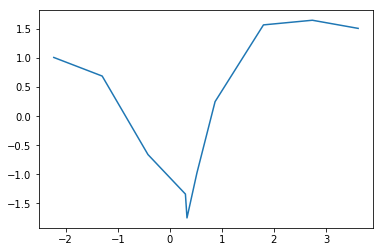

In [3]:
plt.plot(x, y)
plt.show()

### Function for transforming x to phi_x

In [4]:
def define_phi_x(x, k):
    n = len(x)
    phi_x = np.zeros((n, k+1))
    for i in range(n):
        phi_x[i] = np.array([x[i]**j for j in range(k+1)])
    return phi_x

### Defining the parameters used in the code

In [5]:
k_values = [1, 2, 3, 4] # defining all the k values
x_space = np.linspace(-4, 4, 100) # defining the space over which we will use for display
beta = 4
n = 10 # length of x

### Part 1. For each k, compute the posterior of w

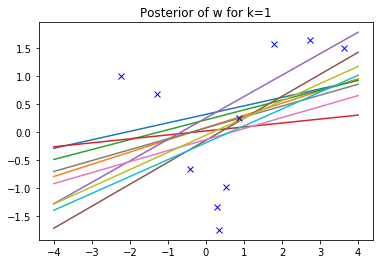

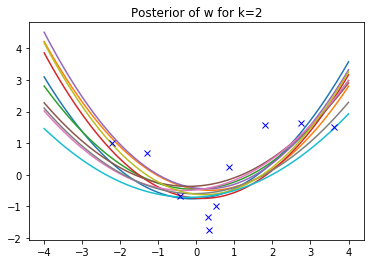

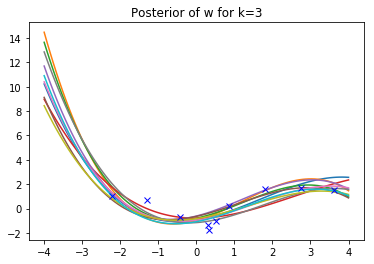

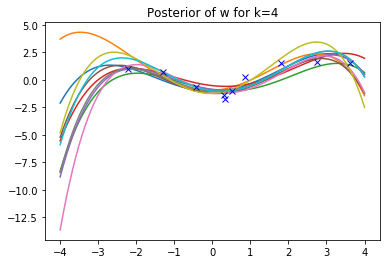

In [6]:
for k in k_values: # looping over all k
    phi_x = define_phi_x(x, k) # doing the transformation over x to get phi_x
    
    cov_w = np.linalg.inv(beta * phi_x.T @ phi_x + np.eye(k+1)) # covariance of w using the formula
    mean_w = beta * cov_w @ phi_x.T @ y # mean of w using the formula
    
    w = np.random.multivariate_normal(mean_w, cov_w, 10) # generating 10 random variables of w
    
    phi_x_space = define_phi_x(x_space, k) # transforming the space
    
    for i in range(10): # looping for each w
        plt.plot(x_space, phi_x_space@w[i])
    plt.plot(x, y, 'bx') # plotting the main data
    plt.title('Posterior of w for k=' + str(k))
    plt.savefig('6_1_k'+str(k)+'.png')
    plt.show()

## Part 2. Computing the posterior predictive of y*

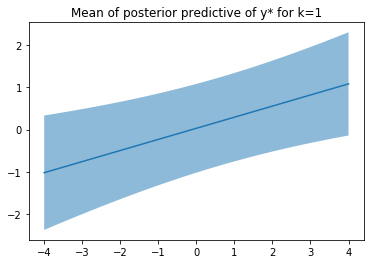

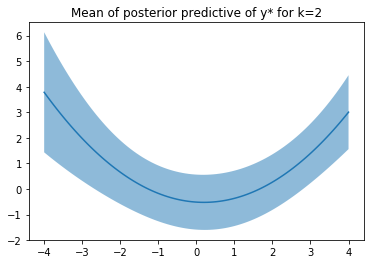

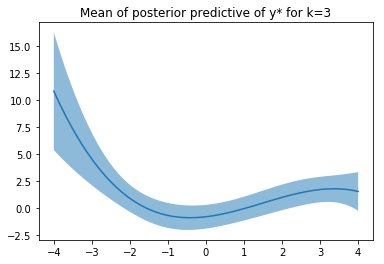

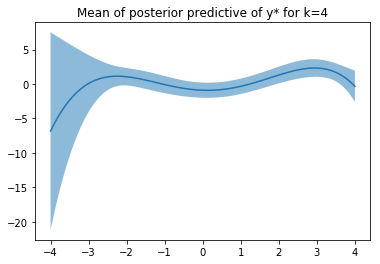

In [7]:
for k in k_values: # looping over all k
    phi_x = define_phi_x(x, k) # doing the transformation over x to get phi_x
    phi_x_space = define_phi_x(x_space, k) # doing the transformation over x to get phi_x
    
    cov_w = np.linalg.inv(beta * phi_x.T @ phi_x + np.eye(k+1)) # covariance of w using the formula
    mean_w = beta * cov_w @ phi_x.T @ y # mean of w using the formula
    
    mean_ppred = phi_x_space @ mean_w # posterior predictive mean 
    std_ppred = np.sqrt(((1/beta) + phi_x_space @ cov_w @ phi_x_space.T).diagonal()) # posterior predictive standard deviation
    
    mean_plus_std_ppred = mean_ppred + 2*std_ppred # adding 2*std_ppred to mean
    mean_minus_std_ppred = mean_ppred - 2*std_ppred # subtracting 2*std_ppred to mean
    
    plt.plot(x_space, mean_ppred) # plotting the mean of posterior predictive
    plt.fill_between(x_space, mean_minus_std_ppred, mean_plus_std_ppred, alpha=0.5)
    # plotting the +- 2*std_dev
    plt.title('Mean of posterior predictive of y* for k=' + str(k))
    plt.savefig('6_2_k'+str(k)+'.png')
    plt.show()

### Part 3. Compute log marginal likelihood

In [8]:
for k in k_values:
    phi_x = define_phi_x(x, k) # transforming x to phi_x
    marginal_likelihood = np.log(multivariate_normal.pdf(y, mean=np.zeros(n), cov=((1/beta)*np.eye(n) + phi_x @ phi_x.T)))
    # Computing the marginal_likelihood using the above formula
    print('For k =', k, 'Log marginal likelihood =', marginal_likelihood)

For k = 1 Log marginal likelihood = -32.352015280445244
For k = 2 Log marginal likelihood = -22.77215317878222
For k = 3 Log marginal likelihood = -22.07907064224274
For k = 4 Log marginal likelihood = -22.386776180355803


### Part 4. Using MAP estimate of w, compute log likelihood

In [9]:
for k in k_values:
    phi_x = define_phi_x(x, k) # transforming x to phi_x
    
    cov_w = np.linalg.inv(beta * phi_x.T @ phi_x + np.eye(k+1)) # computing the covariance of w
    mean_w = beta * cov_w @ phi_x.T @ y # computing the mean of w
    
    likelihood = np.log(multivariate_normal.pdf(y, mean=phi_x @ mean_w, cov=(1/beta)*np.eye(n)))
    # computing the likelihood using the above formula
    print('For k =', k, 'Log likelihood =', likelihood)

For k = 1 Log likelihood = -28.094004379075553
For k = 2 Log likelihood = -15.360663659052214
For k = 3 Log likelihood = -10.935846883615742
For k = 4 Log likelihood = -7.225291259028579
